In [1]:
#==================== Part 0: Basic Function ====================
import numpy as np
#用吴恩达课程的数据老是跑不对，theta相差很大，也找不出问题，换了一个sk自带的数据，又可以了。。。不知道问题出在哪
with open('D:\ex2data1.txt', 'r') as f:  
    data = f.readlines()  #txt中所有字符串读入data  
datamat = []
for line in data:  
    odom = line.strip().split(',')        #将单个数据分隔开存好  
    numbers_float = list(map(float, odom)) #转化为浮点数  
    datamat.append(numbers_float)
#print datamat
datanp = np.array(datamat)
print(datanp.shape)
x = datanp[:,(0,1)].reshape((100,2))  
y = datanp[:,2].reshape((100,1))
y = y.astype(np.int32) 

# from sklearn.datasets.samples_generator import make_blobs
# x, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=0, center_box=(10, 20))
# lenY = len(y)
# y=y.reshape((lenY,1))

(100, 3)


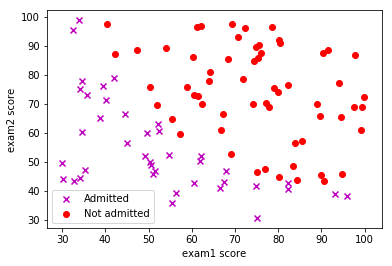

In [2]:
#%% ==================== Part 1: Plotting ====================
#We start the exercise by first plotting the data to understand the the problem we are working with.
import matplotlib.pyplot as plt

def plotData(x,y):
    fig = plt.figure()  
    ax= fig.add_subplot(111) #使画在一个图上
    
    pos = np.where(y[:,0]==0) #y为类似矩阵形式，所以要再取第一列
    neg = np.where(y[:,0]==1)
    ax1 = plt.scatter(x[pos,0], x[pos,1], marker = 'x', color = 'm')  
    ax2 = plt.scatter(x[neg,0], x[neg,1], marker = 'o', color = 'r')  
    plt.xlabel('exam1 score') 
    plt.ylabel('exam2 score')
    
    plt.legend([ax1, ax2], ['Admitted', 'Not admitted'])
    plt.show()

plotData(x,y)


In [20]:
#============ Part 2: Compute Cost and Gradient ============

#Compute and display initial cost and gradient
def sigmoid(z):
    #z is a matrix
    return 1.0/(1+np.exp(-z))
    
def costFunction(theta, X, y):
    m=len(y)
    h = sigmoid(np.dot(X,theta)) 
    J = -1.0/m*np.sum(np.dot(y.T,np.log(h))+np.dot((np.ones((m,1))-y).T,np.log(1.0-h)))
    #要加sum 不然就是nadarry形式，不是单纯一个数字！！！
    return J

def gradientDescent(x,y,alpha=0.001,iterations=1500):
    J_history=[]
    X = np.hstack((np.ones((len(y),1)),x)) 
    m,n = X.shape
    theta = np.zeros((n , 1))
    for i in range(iterations):
        h = sigmoid(np.dot(X,theta))
        grad = 1.0/m*np.dot(X.T,(h-y))
        theta = theta - alpha*grad

        J = costFunction(theta, X, y)
        J_history.append(J)  
    return theta,J_history

final_theta,J_history = gradientDescent(x,y,alpha=0.001,iterations=300000)

print(final_theta)

[[-9.25573205]
 [ 0.07960975]
 [ 0.07329322]]


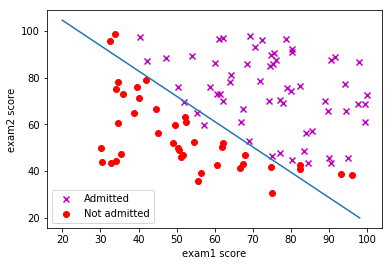

In [21]:
#%% ============= Part 4: Visualizing J(theta_0, theta_1) =============
def plotLR(final_theta,x,y):
    fig = plt.figure()  
    ax= fig.add_subplot(111) #使画在一个图上
    
    pos = np.where(y[:,0]==1.) #y为类似矩阵形式，所以要再取第一列
    neg = np.where(y[:,0]==0.)
    
    ax1 = plt.scatter(x[pos,0], x[pos,1], marker = 'x', color = 'm')  
    ax2 = plt.scatter(x[neg,0], x[neg,1], marker = 'o', color = 'r')  
    
    plt.xlabel('exam1 score') 
    plt.ylabel('exam2 score')
    
    plt.legend([ax1, ax2], ['Admitted', 'Not admitted'])


    #final_theta = np.array([-25.161,0.206,0.201]).reshape((3,1))
    
    plotX = np.arange(20,100,2)
    plotY = (-final_theta[0]-final_theta[1]*plotX)/final_theta[2] 
    plt.plot(plotX,plotY)
    
    plt.show()
    
plotLR(final_theta,x,y)

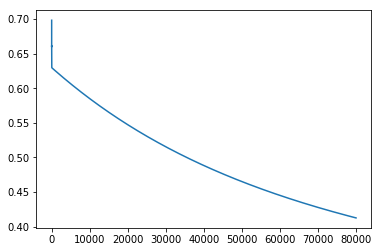

In [17]:
####J
import matplotlib.pyplot as plt  
fig = plt.figure() 
y_plot = J_history
x_plot = np.arange(1,len(y_plot)+1,1)
plt.plot(x_plot,y_plot)
plt.show()